In [ ]:
from google.colab import drive
import gspread

drive.mount('/content/drive', force_remount=True)
BASE_PATH = "/content/drive/MyDrive/papers/SI_AI_KBS/human evaluation"

Mounted at /content/drive


In [ ]:
import csv
import os
import pandas as pd

data = {
    "fold":[],
    "sentence_id":[],
    "polarity":[],
    "method":[],
    "text":[],
    "words":[],
    "annotation":[],
    }

for fold in [0, 1, 2, 3]:
    data_file = os.path.join(BASE_PATH, "annotation_{0}.csv".format(fold))
    anno_file = os.path.join(BASE_PATH, "Form Annotazione {0} (Risposte) - Risposte del modulo 1.csv".format(fold))

    with open(anno_file) as f:
        reader = csv.reader(f)
        header = reader.__next__()[1:]
        values = reader.__next__()[1:]
    anno = {sentence_id: eval(value) for sentence_id, value in zip(header, values)}
    
    with open(data_file) as f:
        reader = csv.DictReader(f)
        for row in reader:
            data["fold"].append(fold)
            data["sentence_id"].append(row["sentence_id"])
            data["polarity"].append(row["method"])
            data["method"].append(row["polarity"])
            data["text"].append(row["text"])
            data["words"].append(row["words"])
            data["annotation"].append(anno[row["sentence_id"]])
df = pd.DataFrame(data)

df.method[df.method=="importance"]='Contextual\nImportance'
df.method[df.method=="utility"]='Utility\nImportance'
df.method[df.method=="attention"]='Explanatory\nAttention'
df.method[df.method=="attentionwmal"]='WMAL\nAttention'
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to b

,fold,sentence_id,polarity,method,text,words,annotation
0,0,0,positive,Contextual\nImportance,<user> <hashtag> riso </hashtag> procedura per...,"<url>, regolamento, riso",3
1,0,6,positive,WMAL\nAttention,<user> disponibile il catalogo di <hashtag> sy...,"agricoltura, sfide, agricoltura",3
2,0,7,positive,Explanatory\nAttention,celebrazioni di <hashtag> sant antonio abate <...,"di, piazza, in",5
3,0,12,positive,Utility\nImportance,<user> <user> / obbligo <hashtag> eti chet tat...,"made, tatura, </hashtag>",5
4,0,15,positive,Contextual\nImportance,<hashtag> quali vita forum </hashtag> remaschi...,"</hashtag>, <hashtag>, che",5
...,...,...,...,...,...,...,...
251,3,691,negative,Contextual\nImportance,<hashtag> elezioni europee </hashtag> <hashtag...,"mettere, a, elezioni",1
252,3,708,negative,WMAL\nAttention,<hashtag> pil </hashtag> l <hashtag> agricoltu...,"recupero, non, difficili",5
253,3,767,negative,Explanatory\nAttention,al via la transumanza ma mancano <number> mili...,"allarme, appello, <url>",5
254,3,773,negative,Utility\nImportance,ambiente coldiretti in italia un cittadino su ...,"questi, oggetti, posate",1


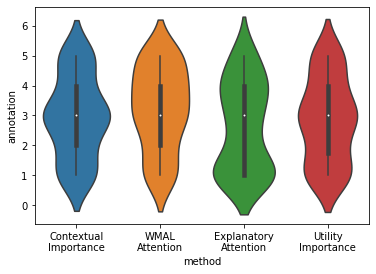

In [ ]:
import seaborn as sns
ax = sns.violinplot(x="method", y="annotation", data=df)


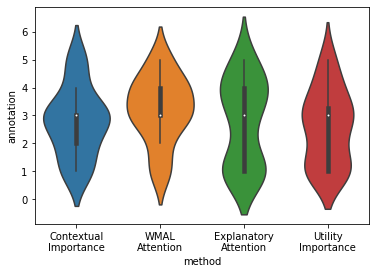

In [ ]:
ax = sns.violinplot(x="method", y="annotation", data=df[df['polarity']=='positive'])


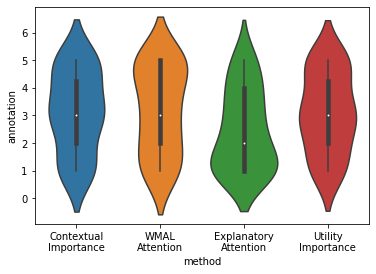

In [ ]:
ax = sns.violinplot(x="method", y="annotation", data=df[df['polarity']=='negative'])


In [ ]:
print (df.annotation[df.method=="attention"].median(), df.annotation[df.method=="attention"].std())
print (df.annotation[df.method=="importance"].median(), df.annotation[df.method=="importance"].std())
print (df.annotation[df.method=="utility"].median(), df.annotation[df.method=="utility"].std())
print (df.annotation[df.method=="attentionwmal"].median(), df.annotation[df.method=="attentionwmal"].std())

data=df[df['polarity']=='positive']
print (data.annotation[data.method=="attention"].median(), data.annotation[data.method=="attention"].std())
print (data.annotation[data.method=="importance"].median(), data.annotation[data.method=="importance"].std())
print (data.annotation[data.method=="utility"].median(), data.annotation[data.method=="utility"].std())
print (data.annotation[data.method=="attentionwmal"].median(), data.annotation[data.method=="attentionwmal"].std())

data=df[df['polarity']=='negative']
print (data.annotation[data.method=="attention"].median(), data.annotation[data.method=="attention"].std())
print (data.annotation[data.method=="importance"].median(), data.annotation[data.method=="importance"].std())
print (data.annotation[data.method=="utility"].median(), data.annotation[data.method=="utility"].std())
print (data.annotation[data.method=="attentionwmal"].median(), data.annotation[data.method=="attentionwmal"].std())


2      5
6      3
10     5
14     5
18     3
      ..
237    1
241    1
245    2
249    1
253    5
Name: annotation, Length: 64, dtype: int64 1.4960264830861913
3.0 1.3619510689763104
3.0 1.4054175225527867
3.0 1.3821961763227641
3.0 1.5394673356129889
3.0 1.2374368670764582
3.0 1.3406636536648797
3.0 1.184152752788036
2.0 1.4587748947484622
3.0 1.4756081305138942
3.0 1.4448880970176292
3.0 1.5747503642410816
